# A Random Walk based Trust Ranking in Distributed Systems
-----------
-----------
![](https://d1rkab7tlqy5f1.cloudfront.net/Websections/TU%20Delft%20Huisstijl/TU_Delft_logo_RGB.png?raw=true)

<center>
Alexander Stannat 
</center>

<center>
07.09.2018
</center>

## Preface


This document is a report written for the course in "Blockchain Engineering" taken at 
Delft University of Technology in 2018. It was written to aid the Blockchain Lab's
research on cooperation in distributed systems. 

In it we discuss the implementation of 
an algorithm to determine the trustworthiness of agents in a peer-to-peer file sharing 
network, called Tribler. 

In this way, we hope to contribute to the lab's long-term goal of achieving a universal
mechanism of generating trust in distributed networks.


## Table of Contents:
1. Introduction
		1.1 Historical Background
		1.2 Trustchain 
		1.3 Problem Description
2. The Algorithm

## Introduction <a id="Introduction"></a>
### Historical Background <a id="HistoricalBackground"></a>

With the ever-growing expansion and widespread acceptance of the internet the field of research in distributed systems 
is gaining evermore importance. In its simplest definition, a distributed system is a group of different processors working together on a common task. These processors have a shared state, operate concurrently and can fail independently. The primary 
advantages of a distributed system over a centralized system are scalability, fault-tolerance and low latency. There are however some drawbacks to the decentralized nature of these networks. The most notable being resource-management.  

A particular example of distributed systems are peer-to-peer networks, also known as P2P networks. A peer-to-peer network allows computers to communicate without the need for a central server. Peer-to-peer file sharing refers to the distribution of digital media over a P2P network, in which the files are located on individuals' computers and shared with other members of the network, rather than on a centralized server. P2P software was the piracy method of choice in the early 2000s with software programs such as LimeWire, Gnutella and the Bittorent client being the most prominent sites. A Supreme Court decision in 2005 led to the closureof many of these sites for illegally sharing copyrighted material, mostly music.​

In a peer-to-peer file sharing network agents up- and download files over the network to one another in a cooperative manner, whereby
an agent that is holding a file (or at least a part of it) can offer it to other agents that require it, through actions called seeding and leeching. Seeders are those who offer upload bandwidth while leechers are the agents that only download. However, such systems have a clear and fundamental problem: users have an obvious incentive to download, but no inherent incentive to upload.
Early file sharing networks such as the BitTorrent protocoll employ a tit-for-tat strategy to incentivize its users to participate reciprocally. 

Tit-for-tat is an effective strategy in game theory for the prisoner's dilemma , in which one agent cooperates first and then replicates it's opponents previous actions. Peers in the BitTorrent network have a limited number of upload slots to allocate. An agent will begin by exchanging upload bandwidth for download bandwidth with a number of its peers. If one of these peers turns out to be a leecher, i.e. does not reciprocate, it will be *choked*. This means the agent will discontinue it's cooperation and assign the corresponding upload slot to another randomly chosen peer; a process that is known as *optimistic unchoking*. 

In this setting agents do not keep a memory about their peer's reliability which enables forms of freeriding and other types of uncooperative behavior. There is no mechanism with which peers can be evaluated based on their reliability or trustworthiness as nodes in the network. The Blockchain Lab of the TU Delft aims to solve this problem exactly: Is it possible to incorporate a digital counterpart to trust in a distributed network with not central authority? Their peer-to-peer file sharing network called *Tribler* leverages social phenomena such as social networks and friendships in an attempt to optimize the traditional BitTorrent protocol. 

### Trustchain <a id="Trustchain"></a> 

In order to build such a digital reputation scheme a distributed storage space or ledger is required. The Tribler application applies their own type of blockchain called *Trustchain*. The trustchain maintains records of all interactions between peers in the network, in respective blocks. Each block contains data about an individual transaction between two peers, such as the respective up-and download values, the peers' public keys and signatures as well as block sequence numbers and respective hashes. Blocks are linked to one another through hash pointers. Each block is then connected to two preceding and two succeeding blocks. This results in many different chains, each corresponding a single agent's transaction history.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS6Cf1tDXgQqnS7Sf3bdHkggx2OmMzHm_cwfFWB8ZyOg8zPtN8F)

When two agents interact with one another they share their chains with eachother and may even store information about each other's chains as well. This structure is strongly scalable, both in the number of agents in the network as well as in the number of transactions per agent. Moreover, the trustchain does not maintain a global consensus. This means that double-spends are not actually prevented as they are in traditional blockchains. However, they are made detectable and can subsequently be penalized through peer rejection or even by banning dishonest nodes from the network. Thereby fraudulent activity is not prevented but strongly disincentivized.

As discussed in [Historical Background](#HistoricalBackground) the long standing issue of tribler is digitizing a method for evaluating the trustworthiness or reputation of nodes agents in a network. Such a mechanism is meant to deter lazy freerider, i.e. agents that purposefully contribute no or very little resources to the network, but at the sime time utilize the network for their own benefit. There have been many different approaches to this problem, however a viable and accurate solution has yet to be found. The first reputation system introduced in Tribler was *BarterCast*. BarterCast was based on the voluntary reports of agents about their own transactions. An inherent problem with system is the issue of deliberate misreporting about transactions, by agents that have made negative net contributions to the network. After BarterCast another accounting mechanism was introduced: DropEdge, which is an implementation of BarterCast on a subset of the graph and ignore all nodes that are interested in receiving some data. 

### Problem Description <a id="Problem Description"></a>

In this project we aimed to implement a mechanism which enables the ranking of nodes in the tribler network based on their respective contributions made. When a node is looking to query an overlay for a file to download, it will generate this ranking and determine which agent in the swarm it should engage with to maximize the likelihood of a successful transaction and a reciprocal relationship. 

The aim of this project was to implement an algorithm which could effectively rank agents in the Tribler network by their contribution made. This would create some notion of the trustworthiness of these nodes and should be used as an indication of the realibility of the node as an interaction partner. An agent that wants to download some file(s) will then interact with the node of the highest ranking.




## The Algorithm <a id="HistoricalBackground"></a>
### PageRank

Random graphs such as the one modelling the Tribler network are a very common mathematical structure that can be found in many different applications. One of them is the world wide web, where webpages are represented by the vertices of a graph and the edges represent the hyperlinks connecting the webpages. The Google search engine employs a useful algorithm with which it ranks the importance of webpages in the graph.; the PageRank algorithm. Due to the commonality of the underlying graph structure of both networks, it seems like an intelligent approach to extend the use of PageRank to the evaluation of agents in the Tribler network. 

Traditionally, PageRank is computed through a method called the Power Iteration, which is determined in the following way. Let $n $ denote the number of nodes or webpages in the network and define the $n\times{}n$ hyperlink matrix $P$ such that if $i$ is a node with $k$ outgoing edges, and $j$ is a node connected to $i$ then $p_{ij}=\frac{1}{k}$ and $p_{ij}=0$ otherwise. If a page has no outgoing link then the probability is spread evenly among all nodes, i.e. $p_{ij}=\frac{1}{n}$. This can be intrepreted as a *random surfer* on the graph of the web hopping from node to node along the edges and the teleporting to a random node in the graph with probability $c$ at every stop. It will also teleport once it reaches a dangling node, i.e. a ndoe with no outgoing edges. Thus, the PageRank is deﬁned as a stationary distribution of a Markov chain whose state space is the set of all Web pages, and the transition matrix is given by 
\begin{equation}
\tilde{P} =  (1-c)P +  c\left(\frac{1}{n}\right)E 
\end{equation} 
where $E$ is a $n\times{}n$ matrix with all values equal to one and $c\in{}(0,1)$ is the reset probability. This matrix is stochastic, aperiodic and irreducible and therefore there exists a unique vector $\pi$ such that 
\begin{equation}
\tilde{P}\pi = \pi,\quad \pi\underline{1} = 1
\end{equation}
This vector $\pi$ is then called the PageRank vector. The values $\pi_i$ can be interpreted as the probability of a random surfer landing on page $i$ in an infinite random walk. It denotes the importance of webpages in the graph. 

The Power Iteration computes this vector in an iterative manner. One begins with $\pi_0(i)=\frac{1}{n}$ for all nodes $i=1,...,n$. The values are then computed iteratively as follows. 
\begin{equation}
\pi_{k+1}(i) = \frac{1-c}{n} + \sum\limits_{j| (j,i)\in\mathcal{E}}\left(\frac{\pi_k(j)c}{outdeg(j)})
\end{equation}

### Monte Carlo Methods for PageRank approximation

The end-point of a random walk that starts from a random page and can be terminated at each step with probability $1−c$, appears to be a sample from the distribution $\pi$. Thus, after repeating the process many times, the estimate of $\pi_j$ for $j = 1,...,n$ is determined as the number of times when a run crosses $j$, divided by the total number of runs. PageRank can be approximated by such an iterative algorithm, known as the Monte Carlo method. The Monte Carlo method for estimating the PageRank vector has several advantages over the power iteration method. It provides a good estimation of PageRank after relatively few iterations, it has natural prallel implementation and finally, it allows for incremental updates of the underlying graph structure, enabling for continous computations of the PageRank. Something that we will further elaborate on later. 

Monte Carlo algorithms are motivated by the following formula
\begin{equation} 
\label{eq:PageRankEquation}
\pi = \frac{1-c}{n}\underline{1}^T \left[\mathbb{1} - cP\right]^{-1} = \frac{1-c}{n}\underline{1}^{T}\sum\limits_{k=0}^{\infty}c^kP^k,\tag{$1$}
\end{equation}
which suggests a simple way of sampling from the PageRank distribution. We choose to run a simple random walk $(X_t)_{t\geq{}0}$, $m$ times from each node in the network that either stops with probability $c$ at every node reached, or when a dangling node is reached, else it transitions along the edges as determined by matrix $P$. Therefore the length of random walks varies. According to \eqref{eq:PageRankEquation} The nodes reached by these random walks then should approximate the distribution of $\pi$.  
$
\begin{figure}
![](https://2.bp.blogspot.com/-nn37hjdFR8E/UzqHsJHfQMI/AAAAAAAABHg/b7_7JjkGmIQ/s1600/g4.gif)
\caption{Example of Monte Carlo PageRanks}
\end{figure}
$
Let $W_{ij}$ be a random variable denoting the number of times the random walk $(X_t)_{t\geq 0}$ reaches  node $j$ given that it originated at node $i$. Formally,
\begin{equation}
\mathbb{P}(W_{ij} = x) = \mathbb{P}\left(\left[\sum\limits_{t=0}^{\infty}\mathbb{1}_{\left\lbrace X_t=j\right\rbrace}\right]=x|Y_0=i\right)
\end{equation}
Then, the estimator for $\pi$ obtained by this algorithm is given by 
\begin{equation}
\bar{\pi}_j = \left[\sum\limits_{l=1}^{m}\sum\limits_{i=1}^{n}W^{(l)}_{ij}\right]\left[\sum\limits_{l=1}^{m}\sum\limits_{i,j=1}^{n}W^{(l)}_{ij}\right]^{-1}
\end{equation}
where $W^{(l)}$, $l\geq{}1$ are independent random variables of the same distribution as $W_{ij}$. 

Theorem 1 in [Avrachenkov, Konstantin, et al](https://epubs.siam.org/doi/abs/10.1137/050643799) states that the estimator $\bar{\pi}_j$ converges to $\pi_j$ as the number of random walks goes to infinity. Thus $\bar{\pi}$ is a consistent estimator. Additionally it is shown that this particular Monte Carlo method achieves an error of about 1% for the highest 12 nodes. Thus, the deﬁned $\bar{\pi}$'s are accurate approximations of the actual PageRank values $\pi$. [https://arxiv.org/abs/1006.2880](Bahmani, B., Chowdhury, A., & Goel, A.) showed that this estimator is, in fact unbiased and sharply concentrated around its 

### Personalization 

Recall the primary idea behind the PageRanks of nodes was for a node seeking to acquire data, to evaluate the peers in its vicinity. There is no central authority which it can query for these values and it cannot necessarily rely on other agents sharing information about their previous transactions with other nodes honestly. Therefore, the node must determine these values by itself. We adjust the Monte Carlo method such that all random walks originate from the same node, i.e. the downloader, also known as the seed node. The PageRanks are computed analogously. The PageRank vector obtained through this method is called personalized PageRank. The PageRanks are computed by the code below.


In [ ]:
import random
from numpy import cumsum, array


class IncrementalPersonalizedPageRank2(object):
    """
    Class to incrementally compute the personalized page ranks of a graph from the perspective of a predetermined
    node in the graph.

    Page rank is an algorithm with which nodes in a directed graph are ranked by their respective importance.
    Personalized page rank is an alternate version of page rank where the ranks of nodes are determined by their
    distance from a given seed node.
    Usually, the page ranks in a network are computed using an iterative procedure called the power iteration.
    In this class the page ranks are computed using the monte carlo method, whereby a number of random walks
    originate from the seed node and walk along the edges through the graph. They jump back
    to the seed node with a given probability at every step, at which point the walk is terminated.
    If a random walk reaches a "dangling node", i.e. a node with no outgoing edges it is reset as well.
    A vector of visit times is computed containing the number of times the random walk passes through the individual
    nodes and the page rank is given by the visit times divided by the accumulated visit times of all nodes in the
    graph.
    The personalised page rank given below is incremental, meaning that it can be recomputed every time the underlying
    graph structure is modified. In order to recompute the page ranks, one doesn't have to recompute the entire set
    of random walks through the graph. Instead, the given set of random walks is modified. The idea behind this is
    that a given random walk does not pass through every single edge. Only random walks that reach a node for which
    the outgoing edges have been modified, i.e. an edge is added or removed, or the weight of an edge is changed,
    need to be recomputed, starting from the first node for which such changes have occurred.
    """
    def __init__(self, graph, node, number_of_random_walks, reset_probability):
        """
        Initializes the incremental personalized page rank class by determining the graph, the seed node, the number
        of random walks, the reset probability and the length of each random walk.

        :type node: The seed node at which all random walks begin
        :param graph: The graph for which the incremental page rank is computed
        :param number_of_random_walks: The number of random walks starting at the seed node
        :param reset_probability: The probability with which a random walk jumps back to the seed node
        """
        self.graph = graph
        self.node = node
        self.number_of_random_walks = number_of_random_walks
        self.reset_probability = reset_probability
        self.random_walks = list()
        
    def initial_random_walks(self):
        """
        Initiates the random_walk_from_node function starting from the seed node, number_of_random_walks times
        """
        while len(self.random_walks) < self.number_of_random_walks:
            self.regular_random_walk(self.node)
        return
    
    def regular_random_walk(self, node):
        """
        Computes a random walk starting from node and appending all nodes it passes though to the list random_walk
        :param node: The node at which the random walk begins
        """
        random_walk = [node]
        c = random.uniform(0, 1)
        while c > self.reset_probability:
            if len(list(self.graph.neighbors(random_walk[-1]))) > 0:
                current_node = random_walk[-1]
                current_neighbors = list(self.graph.neighbors(current_node))
                current_edge_weights = array(
                    [self.graph[current_node][neighbor]['weight'] for neighbor in current_neighbors])
                cumulated_edge_weights = cumsum(current_edge_weights)
                if cumulated_edge_weights[-1] == 0:
                    break
                random_id = list(
                    cumulated_edge_weights < (random.uniform(0, 1) * cumulated_edge_weights[-1])).index(
                    False)
                next_node = current_neighbors[random_id]
                random_walk.append(next_node)
                c = random.uniform(0, 1)
            else:
                break
        self.random_walks.append(random_walk)
        return
    
    def compute_personalized_page_ranks(self):
        """
        Determines the personalized page ranks based the random walks in the list random_walks
        :return: A dictionary of nodes and corresponding page ranks
        """
        zeros = [0 for _ in range(len(list(self.graph.nodes)))]
        page_ranks = dict(zip(list(self.graph.nodes), zeros))
        visit_times = dict(zip(list(self.graph.nodes), zeros))
        nodes_in_random_walks = []
        for random_walk in self.random_walks:
            nodes_in_random_walks.extend(random_walk)
        for node in self.graph.nodes:
            visit_times[node] = nodes_in_random_walks.count(node)
        for node in self.graph.nodes:
            try:
                page_ranks[node] = float(visit_times[node]) / sum(visit_times.values())
            except ZeroDivisionError:
                print "List of visit times is empty..."
        return page_ranks

### Incremental Computation

The tribler network does not stay still. Accounts are made and deleted continuously and therefore nodes and edges come and go. Edges are added and removed or have their weight changed through transactions. Consequently the PageRank values fluctuate and have to be recomputed everytime the graph structure changes. It is simply unsustainable to recompute all random walks from scratch everytime the network is updated, and also unnecessary. Small alterations made to the graph, such as the addition or deletion of individual nodes and/or edges, are unlikely to impact a significant proportion of random walks in the network. Therefore it's not just not necessary to recompute all random walks everytime the graph changes. 

Only those random walks that pass through an edge or node that has been altered, need to be reviewed. And they only need to be recomputed starting at the last node they reached before they passed the modified region (edge or node). Let's say a node is removed from the network. All random walks that reach a node, the removed node was connected to, are then recomputed starting at the that node. If an edge is removed then all random walks that reaching the source node of the removed edge are recomputed starting at the source node. The same goes for when an edge is added. This, of course is an alternative that is computationally far less expensive than a rerun of the entire algorithm everytime an edge is added or removed.

[Bahmani, B., Chowdhury, A., & Goel, A.](https://arxiv.org/abs/1006.2880) proved the following two theorems about the expected amount of additional update work for arriving and disappearing edges. 

*Theorem 1* 
Let $(u_t, v_t)$ be the $t^{th}$ random edge that is added to the graph and let $M_t$ be the random variable that determines the number of random walk segments that then need to be updated. Finally denote $R$ the number of random walks and $l_i$ the length of the $i^{th}$ random walk. It then holds
\begin{equation}
\mathbb{E}[M_t] \leq \sum\limits_{i=1}^{R}l_i\mathbb{E}[\frac{\pi_{u_t}}{outdeg_{u_t}(t)}]
\end{equation}
Additionally it holds 
\being{equation}
\mathbb{E}[\frac{\pi_{u_t}}{outdeg_{u_t}(t)}] = \frac{1}{t}
\end{equation}
So it is
\begin{equation}
\mathbb{E}[M_t] \leq \frac{1}{t}\sum\limits_{i=1}^{R}l_i
\end{equation}
For each random walk segment that needs to be updated, we compute a random walk from the corresponding source node. Hence, we can expect $\frac{1}{c}$ work per recomputed random walk. Now, we can sum up the expected amount of update work over $m$ edge arrivals and we obtain 
\begin{equation}
\mathbb{E}[\sum\limits_{t=1}^{m}M_t] \leq \frac{1}{\vareps}\sum\limits_{i=1}^{R}l_i \sum\limits_{t=1}^{m}\frac{1}{t}  
\end{equation}
Seeing as the harmonic series is bounded from above by the natural logarithm, we finally obtain 
\begin{equation}
\mathbb{E}[\sum\limits_{t=1}^{m}M_t]\leq\frac{1}{\vareps}\sum\limits_{i=1}^{R}l_i \ln{m} \approx \frac{R}{\vareps^2}
\end{equation}

For the counterpart of edges leaving the graph we have the following result

*Theorem 2*

For a network with $m$ edges, if a randomly chosen edgeleaves the graph, then the expected amount of work necessary to update the walk segments is at most 
\begin{equation}
\frac{1}{\vareps}\sum\limits_{i=1}^{R}l_i\approx\frac{R}{\vareps^2}
\end{equation}
From this we learn that the cost to keep the PageRank approximations updated is only logarithmically larger than the cost of the initial computation and that the marrginal update cost decreases with later edges making it increasingly cost effective over time, enabling real-time updates at a later stage.

The incremental updates of the PageRank values are implemented by the code below.

In [6]:
self.random_walks = list()
self.added_edges = list()
self.removed_edges = list()


def add_edge(self, source, destination, weight):
    """
    Adds an edge to the graph. Then adds the edge to the list added_edges
    :param source: source node
    :param destination: destination node
    :param weight: weight of the edge
    """
    if weight == 0 or source not in self.graph or destination not in self.graph:
        return
    if self.graph.has_edge(source, destination):
        self.add_weight_to_edge(source, destination, weight)
    elif self.graph.has_edge(destination, source):
        self.add_weight_to_edge(destination, source, -weight)
    else:
        if weight > 0:
            edge = (source, destination, weight)
        elif weight < 0:
            edge = (destination, source, -weight)
        self.graph.add_weighted_edges_from([edge])
        self.added_edges.append(edge)


def add_weight_to_edge(self, source, destination, weight):
    """
    Takes an existing edge and updates its weight. Then adds the edge to the list added_edges
    :param source: source node of the edge
    :param destination: destination node of the edge
    :param weight: weight added to the edge
    """
    if weight == 0:
        return
    if self.graph.has_edge(source, destination):
        self.graph[source][destination]['weight'] += weight
        if self.graph[source][destination]['weight'] < 0:
            edge = (destination, source, -self.graph[source][destination]['weight'])
            self.graph.remove_edge(source, destination)
            self.graph.add_weighted_edges_from([edge])
            self.removed_edges.append((source, destination))
            self.added_edges.append(edge)
        elif self.graph[source][destination]['weight'] > 0:
            edge = (source, destination, self.graph[source][destination]['weight'])
            self.graph.remove_edge(source, destination)
            self.graph.add_weighted_edges_from([edge])
            self.added_edges.append(edge)
        elif self.graph[source][destination]['weight'] == 0:
            self.graph.remove_edge(source, destination)
            self.removed_edges.append((source, destination))

    elif self.graph.has_edge(destination, source):
        self.graph[destination][source]['weight'] -= weight
        if self.graph[destination][source]['weight'] < 0:
            edge = (source, destination, -self.graph[destination][source]['weight'])
            self.graph.remove_edge(destination, source)
            self.graph.add_weighted_edges_from([edge])
            self.added_edges.append(edge)
            self.removed_edges.append((destination, source))
        elif self.graph[destination][source]['weight'] > 0:
            edge = (destination, source, self.graph[destination][source]['weight'])
            self.graph.remove_edge(destination, source)
            self.graph.add_weighted_edges_from([edge])
            self.added_edges.append(edge)
        elif self.graph[destination][source]['weight'] == 0:
            self.graph.remove_edge(destination, source)
            self.removed_edges.append((destination, source))
    else:
        self.add_edge(source, destination, weight)
    return


def remove_edge(self, source, destination):
    """
    Removes an edge from the graph and adds it to the list added_edges
    :param source: source node of the edge
    :param destination: destination node of the edge
    """
    if self.graph.has_edge(source, destination):
        edge = (source, destination)
        self.graph.remove_edge(source, destination)
        self.removed_edges.append(edge)
    elif self.graph.has_edge(destination, source):
        edge = (destination, source)
        self.graph.remove_edge(destination, source)
        self.removed_edges.append(edge)
    return


def add_node(self, node):
    """
    Adds a node to the graph
    :param node: Node that is to be added
    """
    if node not in self.graph.nodes:
        self.graph.add_node(node)
    else:
        print "node already in graph"
    return


def remove_node(self, node):
    """
    Removes a node from the graph
    :param node: node that is to be removed
    """
    if node in self.graph.nodes:
        for successor in self.graph.successors(node):
            if (node, successor) in self.added_edges:
                self.added_edges.remove((node, successor))
            if (node, successor) in self.removed_edges:
                self.removed_edges.remove((node, successor))
        for predecessor in self.graph.predecessors(node):
            if (predecessor, node) not in self.removed_edges:
                self.removed_edges.append((predecessor, node))
            if (predecessor, node) in self.added_edges:
                self.added_edges.remove((predecessor, node))
        self.graph.remove_node(node)
    return


def update_random_walks(self):
    """
    Takes the lists added_edges and removed_edges and recomputes all random walks that have traversed these
    edges, starting from their respective source nodes. The new random walks then replace the old ones in the
    list random_walks. Finally the edges are removed from the lists added_edges and removed_edges
    """
    for edge in reversed(self.added_edges):
        self.added_edges.remove(edge)
        random_walks_to_change = [random_walk for random_walk in self.random_walks if edge[0] in random_walk]
        for random_walk in random_walks_to_change:
            self.random_walks.remove(random_walk)
            del random_walk[random_walk.index(edge[0])+1:]
            self.add_random_walk(random_walk)

    for edge in reversed(self.removed_edges):
        self.removed_edges.remove(edge)
        random_walks_to_change = [random_walk for random_walk in self.random_walks if edge[0] in random_walk]
        for random_walk in random_walks_to_change:
            self.random_walks.remove(random_walk)
            del random_walk[random_walk.index(edge[0]) + 1:]
            self.add_random_walk(random_walk)
    return

NameError: name 'self' is not defined

The main idea here is that whenever an edge is removed or added from or to the graph it is appended to one of the two lists: "added_edges" or "removed_edges". Once the "update_random_walks" function is called, all random walks passing through one of these edges are recomputed at the source node of the given edge. Note that nodes that are added or removed can be disregarded as they don't impact the random walk. It also needs to be ensured that edges that the recomputation of random walks stays in tune with the order in which edges were added and removed, in order to avoid errors.

## Implementation <a id="Implementation"></a>
### Test Cases

In order to test our implementation of the algorithm we ran a set of unit tests, randomly generating graphs and computing the corresponding PageRanks. The networkx module contains a pagerank function which uses the power iteration method with a maximum number of iterations to compute the pageranks of a given graph. We use a unit test and compared the values of the power iteration and the monte carlo method. Next, we randomly modified the graph by adding and removing edges and nodes and recomputed the power iteration values of the PageRanks as well as updating the values of the Monte Carlo method through the upper procedure, and then assert the approcimate equality of the two again. 

Graphs are randomly generated with the number of nodes being randomly chosen in between 2 and 10000. Then edges are added to random nodes in the graph, whereby the number of edges is twice the number of nodes in the network. The edges are randomly weighted with values inbetween 0 and 10. We run a monte carlo algorithm on the generated graph with node 0 being the seed node. We chose to run 500 random walks with a reset probability of 0.3 and to run the power iteration with a maximum number of iterations of 1000, to ensure accuracy. 

We chose to determine the difference between the two vectors by subtracting the respective euclidean norms from one another and dividing by the euclidean norm of the values generated by the power iteration. The assertion tested is this values approximate equality with zero. We find that the difference in the vast majority of cases fluctuates around $5\%$, which could be interpreed as a very good result. The thing to remember is that we are not interessted in all values being perfectly accurate, instead it is the order of the PageRank vector that is relevant. The seed node wants to determine its most trustworthy peers, to decide who to interact with. In that sense the $5\%$ accuracy is satisfactory. 


In [3]:
import unittest
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy
from Page_Rank2 import IncrementalPersonalizedPageRank2


class Tests(unittest.TestCase):
    
    def test_page_rank_5(self):
        self.graph = nx.DiGraph()
        self.number_of_nodes = random.randint(2, 10000)
        self.nodes = range(self.number_of_nodes)
        self.graph.add_nodes_from(self.nodes)
        for _ in range(2*self.number_of_nodes):
            node_1 = random.choice(list(self.graph.nodes))
            node_2 = random.choice(list(set(self.graph.nodes) - {node_1}))
            if self.graph.has_edge(node_1, node_2) or self.graph.has_edge(node_2, node_1):
                continue
            else:
                weight = random.randint(0, 10)
                self.graph.add_weighted_edges_from([(node_1, node_2, weight)])
        pr = IncrementalPersonalizedPageRank2(self.graph, 0, 500, 0.3)
        pr.initial_random_walks()
        page_ranks = pr.compute_personalized_page_ranks()
        page_ranks_2 = nx.pagerank(pr.graph, alpha=0.7, personalization={0: 1},
                                   max_iter=1000, weight='weight')
    
        nx.draw_circular(pr.graph, with_labels=True, node_size=20, with_edge_labels=True)
        plt.show()
    
        diff = numpy.linalg.norm(numpy.array(page_ranks.values()) - numpy.array(page_ranks_2.values())) / \
            numpy.linalg.norm(numpy.array(page_ranks_2.values()))
        self.assertAlmostEqual(diff, 0, 1)
    
        c = random.randint(self.number_of_nodes//4, self.number_of_nodes//2)
        choices = ["Remove Edge / Add Edge", "Change Edge Weight", "Remove Node / Add Node"]
        for _ in range(c):
            choice = random.choice(choices)
            if choice == "Remove Edge / Add Edge":
                node_1 = random.choice(list(pr.graph.nodes))
                node_2 = random.choice(list(set(pr.graph.nodes) - {node_1}))
                if pr.graph.has_edge(node_1, node_2):
                    pr.remove_edge(node_1, node_2)
                elif pr.graph.has_edge(node_2, node_1):
                    pr.remove_edge(node_2, node_1)
                else:
                    weight = random.randint(-10, 10)
                    pr.add_edge(node_1, node_2, weight)
            elif choice == "Change Edge Weight":
                edge = random.choice(list(pr.graph.edges))
                weight = random.randint(-10, 10)
                pr.add_weight_to_edge(edge[0], edge[1], weight)
            elif choice == "Remove Node / Add Node":
                w = random.randint(0, 1)
                if w == 0:
                    pr.add_node(self.number_of_nodes + 1)
                    self.number_of_nodes += 1
                elif w == 1:
                    node = random.choice(list(set(pr.graph.nodes) - {0}))
                    pr.remove_node(node)
    
        nx.draw_circular(self.graph, with_labels=True, node_size=20, with_edge_labels=True)
        plt.show()
    
        pr.update_random_walks()
        new_page_ranks = pr.compute_personalized_page_ranks()
        new_page_ranks_2 = nx.pagerank(pr.graph, alpha=0.7, personalization={0: 1},
                                       max_iter=1000, weight='weight')
        diff = numpy.linalg.norm(numpy.array(new_page_ranks.values()) - numpy.array(new_page_ranks_2.values())) / \
            numpy.linalg.norm(numpy.array(new_page_ranks_2.values()))
        self.assertAlmostEqual(diff, 0, 1)


if __name__ == '__main__':
    unittest.main()

AttributeError: 'module' object has no attribute 'C:\Users\alexa\AppData\Roaming\jupyter\runtime\kernel-c0f23f11-d663-4ad0-a00b-444500b4c2be'

### Convergence Testing

We now determine the rate at which the monte carlo algorithm converges to its final values for different sets of graphs and input parameters. 

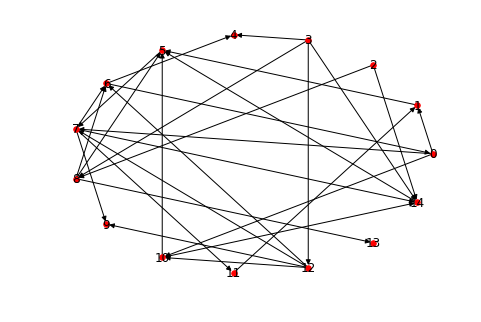

In [4]:
from __future__ import division
import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from Page_Rank import IncrementalPersonalizedPageRank
from Page_Rank2 import IncrementalPersonalizedPageRank2
import numpy as np

random.seed(1)
graph = nx.DiGraph()
number_of_nodes = random.randint(2, 100)
nodes = range(number_of_nodes)
graph.add_nodes_from(nodes)
number_of_random_walks = 10
random_walk_length = 5
difference = list()

for _ in range(2 * number_of_nodes):
    node_1 = random.choice(list(graph.nodes))
    node_2 = random.choice(list(set(graph.nodes) - {node_1}))
    if graph.has_edge(node_1, node_2) or graph.has_edge(node_2, node_1):
        continue
    else:
        weight = random.randint(0, 10)
        graph.add_weighted_edges_from([(node_1, node_2, weight)])
nx.draw_circular(graph, node_size=30, with_labels=True)
plt.show()
